# Задача 8. Сравнение методов классификации

** **Дедлайн**: 28.11.2025, 23:59
* Полный балл: 15

## Задача

- [X] Найти данные, на которых интересно будет решать задачу классификации (больше `1000` строк, больше `5` признаков).
- [X] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [X] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [X] При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [X] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания для библиотечных реализаций (например, из **sklearn**) четырёх методов классификации.
- [X] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Найти данные, на которых интересно будет решать задачу классификации (больше `1000` строк, больше `5` признаков).

##### Данные, на основе которых будем решать - winequality-red

#### Задача: бинарная классификация качества красного вина

### Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=';')

#### Описание датасета

In [3]:
df.shape

(1599, 12)

##### Размер: 
- 1599 образцов вин
- 11 признаков вин
- 1 целевая переменная

In [4]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

##### Признаки :
- "фиксированная кислотность"
- "летучая кислотность"
- "лимонная кислота"
- "остаточный сахар"
- "хлориды"
- "свободный диоксид серы"
- "общий диоксид серы"
- "плотность"
- "рН"
- "сульфаты"
- "спирт"
##### Целевая переменная:
- "качество"


##### Первые 3 строки датасета

In [5]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


##### Статистическое описание датасета

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Описание:
- Пропуски значений признаков
- Среднее значение признаков
- Стандартное отклонение данных
- Минимальное значение данных
- Первый квартиль данных
- Медиана данных
- Третий квартиль данных
- Максимум данных

##### Выводы:
- Пропусков значений нет
- Среднее качество вин: 5.6
- Возможные выбросы у "total sulfur dioxide", "residual sugar"



##### Распределение качества вин

In [7]:
df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

##### Вывод:
- Среднее значение распределения находится на уровне 5-6
- 3-4 - низкое качество вина
- 5-6 - среднее качество вина
- 7-8 - высокое качество вина

##### Выбираем порог качества 6, все, что выше или равно - хорошее вино

In [8]:
df['target'] = (df['quality'] >= 6).astype(int)
df['target'].value_counts()

target
1    855
0    744
Name: count, dtype: int64

##### Вывод: Получаем отношение, близкое к 1/2

### Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

In [9]:
df_clean = df.copy()
df_clean = df_clean.drop('quality', axis=1)

In [10]:
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

Text(0.5, 1.0, 'Распределение качества вина')

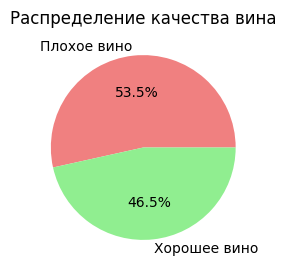

In [51]:
plt.figure(figsize=(4, 3))
target_counts = df_clean['target'].value_counts()
plt.pie(target_counts.values, labels=['Плохое вино', 'Хорошее вино'], 
        autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Распределение качества вина')

#### Вывод: Данные хорошо сбалансированны, соотношение плохого и хорошего вина стремится к 1/2

#### Строим корреляционную матрицу

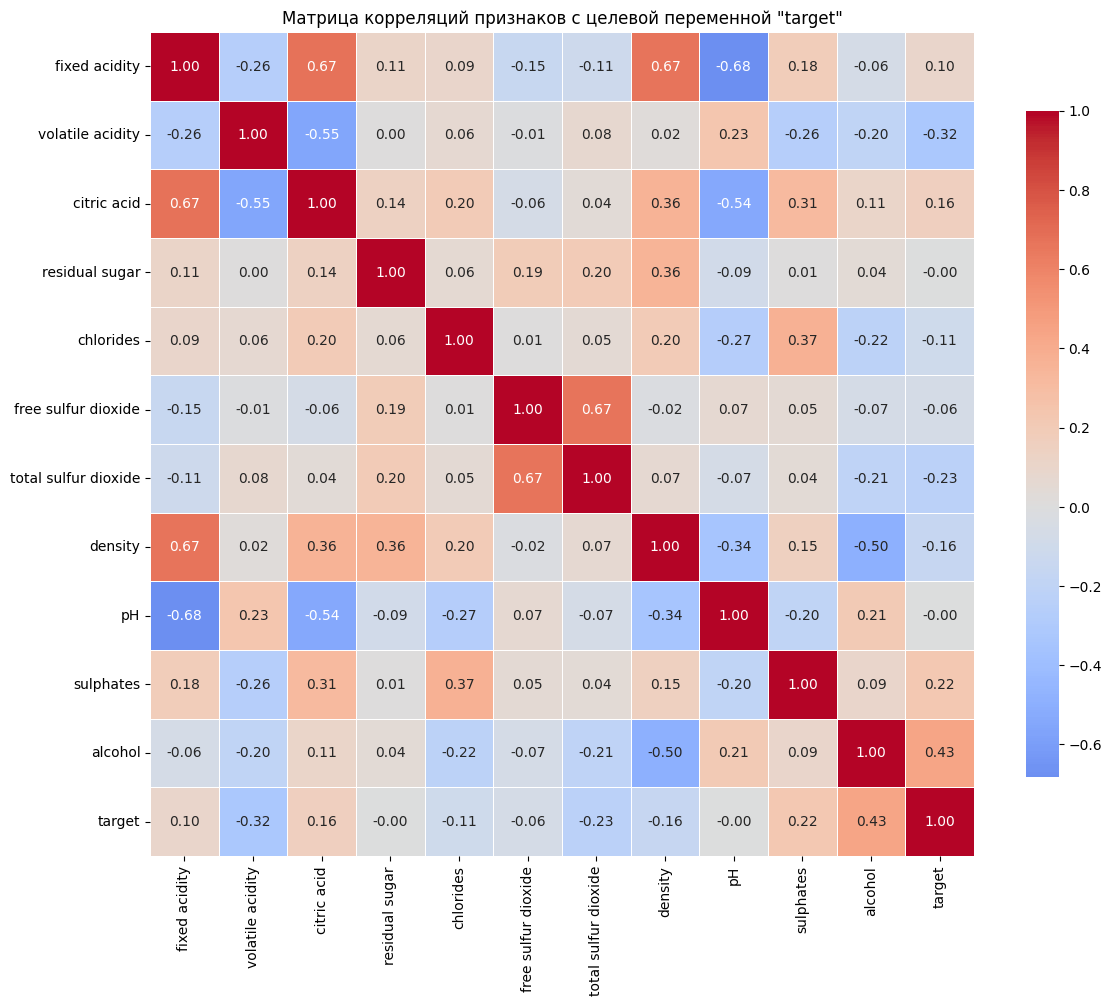

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций признаков с целевой переменной "target"')
plt.tight_layout()
plt.show()

In [13]:
target_correlations = correlation_matrix['target'].abs().sort_values(ascending=False)
print("11 признаков по влиянию на качество:")
for i, (feature, corr) in enumerate(target_correlations.items()):
    if i == 0: continue
    if i > 11: break
    actual_corr = correlation_matrix.loc[feature, 'target']
    direction = "положительная" if actual_corr > 0 else "отрицательная"
    print(f"{i}. {feature:20} | {actual_corr:6.3f} ({direction})")

11 признаков по влиянию на качество:
1. alcohol              |  0.435 (положительная)
2. volatile acidity     | -0.321 (отрицательная)
3. total sulfur dioxide | -0.232 (отрицательная)
4. sulphates            |  0.218 (положительная)
5. citric acid          |  0.159 (положительная)
6. density              | -0.159 (отрицательная)
7. chlorides            | -0.109 (отрицательная)
8. fixed acidity        |  0.095 (положительная)
9. free sulfur dioxide  | -0.062 (отрицательная)
10. pH                   | -0.003 (отрицательная)
11. residual sugar       | -0.002 (отрицательная)


#### Вывод: 
- Алкоголь - самый важный положительный фактор качества
- Летучая кислотность - сильно ухудшает качество
- Остаточный сахар - практически не влияет

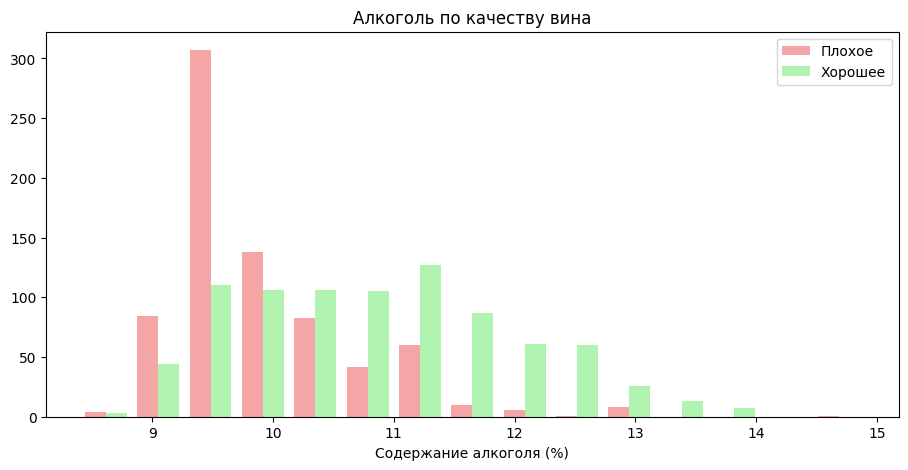

In [53]:
plt.figure(figsize=(11, 5))
good_wine = df_clean[df_clean['target'] == 1]
bad_wine = df_clean[df_clean['target'] == 0]
plt.hist([bad_wine['alcohol'], good_wine['alcohol']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Алкоголь по качеству вина')
plt.xlabel('Содержание алкоголя (%)')
plt.legend()

#### Вывод: Хорошее вино часто имеет более высокое содержания алкоголя

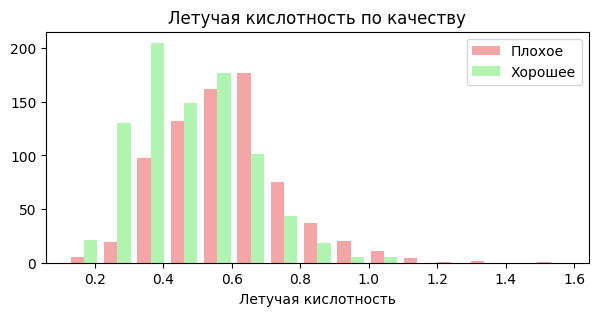

In [47]:
plt.figure(figsize=(7, 3))
plt.hist([bad_wine['volatile acidity'], good_wine['volatile acidity']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Летучая кислотность по качеству')
plt.xlabel('Летучая кислотность')
plt.legend()

#### Вывод: Плохое вино имеют более высокую летучую кислотность

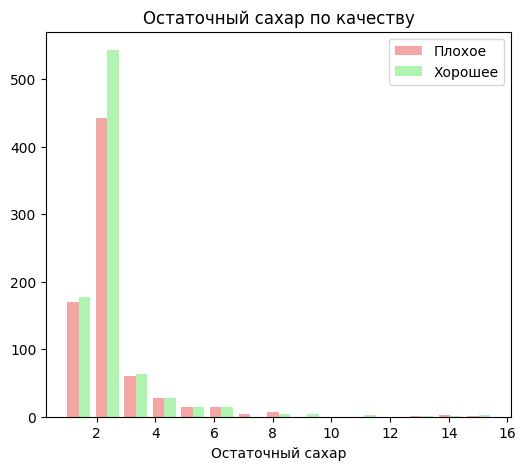

In [46]:
plt.figure(figsize=(6, 5))
plt.hist([bad_wine['residual sugar'], good_wine['residual sugar']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Остаточный сахар по качеству')
plt.xlabel('Остаточный сахар')
plt.legend()

#### Вывод: Остаточный сахар не помогает выявить закономерность, не ключевой фактор

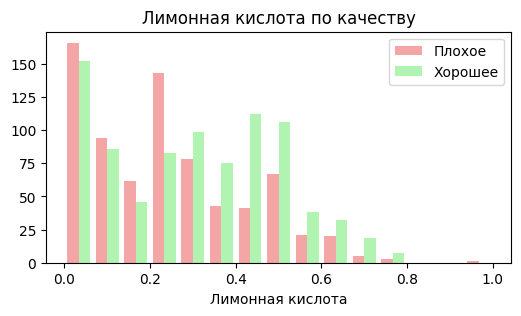

In [45]:
plt.figure(figsize=(6, 3))
plt.hist([bad_wine['citric acid'], good_wine['citric acid']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Лимонная кислота по качеству')
plt.xlabel('Лимонная кислота')
plt.legend()

#### Вывод: Хорошее вино имеет немного большее содержание лимонной кислоты

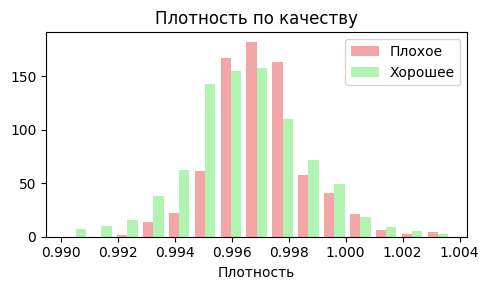

In [44]:
plt.figure(figsize=(5, 3))
plt.hist([bad_wine['density'], good_wine['density']], 
         bins=15, color=['lightcoral', 'lightgreen'], 
         label=['Плохое', 'Хорошее'], alpha=0.7)
plt.title('Плотность по качеству')
plt.xlabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

#### Вывод: Сильной корреляции между плотностью и качеством не видно

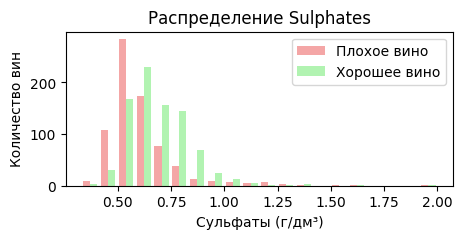

In [43]:
plt.figure(figsize=(5, 2))
plt.hist([bad_wine['sulphates'], good_wine['sulphates']],
         bins=20, color=['lightcoral', 'lightgreen'], alpha=0.7,
         label=['Плохое вино', 'Хорошее вино'])
plt.title('Распределение Sulphates')
plt.xlabel('Сульфаты (г/дм³)')
plt.ylabel('Количество вин')
plt.legend()

#### Вывод: чем больше сульфатов, тем лучше вино

#### Вывод: Хорошие предикторы
- Алкоголь
- Летучая кислотность
- Сульфаты

In [54]:
best_threshold = None
best_difference = -1
best_good = 0
best_bad = 0

print("Поиск оптимального порога для alcohol:")
for threshold in [i/10 for i in range(80, 140, 1)]:
    good_above = (good_wine['alcohol'] > threshold).mean()
    bad_above = (bad_wine['alcohol'] > threshold).mean()
    difference = good_above - bad_above
    if difference > best_difference:
        best_threshold = threshold
        best_difference = difference
        best_good = good_above
        best_bad = bad_above
print(f"Оптимальный порог: {best_threshold}%")
print(f"Хороших вин выше порога: {best_good:.1%}")
print(f"Плохих вин выше порога: {best_bad:.1%}")
print(f"Разница: {best_difference:.1%}")

Поиск оптимального порога для alcohol:
Оптимальный порог: 10.2%
Хороших вин выше порога: 66.4%
Плохих вин выше порога: 25.4%
Разница: 41.0%


- 66.4% хороших вин имеют >10.2% алкоголя
- Порог выбран как точка разделения распределений

In [22]:
best_threshold = None
best_difference = -1
best_good = 0
best_bad = 0

print("Поиск оптимального порога для volatile acidity:")
for threshold in [i/100 for i in range(10, 150, 1)]: 
    good_below = (good_wine['volatile acidity'] < threshold).mean()
    bad_below = (bad_wine['volatile acidity'] < threshold).mean()
    difference = good_below - bad_below
    if difference > best_difference:
        best_threshold = threshold
        best_difference = difference
        best_good = good_below
        best_bad = bad_below

print(f"Оптимальный порог: {best_threshold}")
print(f"Хороших вин ниже порога: {best_good:.1%}")
print(f"Плохих вин ниже порога: {best_bad:.1%}")
print(f"Разница: {best_difference:.1%}")

Поиск оптимального порога для volatile acidity:
Оптимальный порог: 0.55
Хороших вин ниже порога: 68.7%
Плохих вин ниже порога: 39.5%
Разница: 29.1%


- Высокая летучая кислотность - признак дефекта ('уксусность')
- 68.7% хороших вин имеют кислотность < 0.55
- Всего 39.5% плохих вин укладываются в этот порог

In [23]:
best_threshold = None
best_difference = -1
best_good = 0
best_bad = 0

print("Поиск оптимального порога для sulphates:")
for threshold in [i/100 for i in range(0, 200, 1)]:
    good_above = (good_wine['sulphates'] > threshold).mean()
    bad_above = (bad_wine['sulphates'] > threshold).mean()
    difference = good_above - bad_above
    if difference > best_difference:
        best_threshold = threshold
        best_difference = difference
        best_good = good_above
        best_bad = bad_above
print(f"Оптимальный порог: {best_threshold}")
print(f"Хороших вин выше порога: {best_good:.1%}")
print(f"Плохих вин выше порога: {best_bad:.1%}")
print(f"Разница: {best_difference:.1%}")

Поиск оптимального порога для sulphates:
Оптимальный порог: 0.58
Хороших вин выше порога: 76.4%
Плохих вин выше порога: 46.1%
Разница: 30.3%


- Больше сульфатов = лучше вино
- 76.4% хороших вин имеют сульфатов > 0.58

#### residual sugar:
- Низкая корреляция с качеством (-0.002)
- Большое количество выбросов (155)
- Незначимость в предварительном анализе

#### pH:
- Низкая корреляция с качеством (-0.003)
- Незначимость в предварительном анализе

### При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [24]:
df_final = df_clean.copy()

##### Создание бинарных признаков

In [25]:
df_final['alcohol_high'] = (df_final['alcohol'] > 10.2).astype(int)
df_final['volatile_acidity_low'] = (df_final['volatile acidity'] < 0.55).astype(int)
df_final['sulphates'] = (df_final['sulphates'] > 0.58).astype(int)

##### Проанализированы данные и созданы бинарные признаки
##### Признаки хорошего вина:
- Алкоголь, выше 10.2
- Вино с летучей кислотностью менее 0.55
- Сульфаты более 0.58

##### Удаление признаков

In [26]:
df_final = df_final.drop(['residual sugar'], axis=1)
df_final = df_final.drop(['pH'], axis=1)

##### Проанализированы данные и удален признак
- Остаточный сахар имеет плохую корреляцию с качеством вина

##### Было проведено Feature Engineering для признаков, добавлены новые важные, удалены ненужные

In [27]:
df_final.shape

(1599, 12)

##### Финальная версия после Feature Engineering имеет 11 признаков и 1 целевую переменную

### Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания для библиотечных реализаций (например, из **sklearn**) четырёх методов классификации.

In [28]:
X = df_final.drop('target', axis=1)
y = df_final['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((1279, 11), (320, 11), np.float64(0.5347928068803753), np.float64(0.534375))

In [32]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}

In [33]:
best_models = {}
cv_results = []

for name, config in models.items():
    print(f"\n--- Обучение {name} ---")
    
    grid_search = GridSearchCV(
        config['model'], config['params'], cv=5, scoring='f1', n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_
    cv_results.append({
        'Model': name,
        'Best CV Score': grid_search.best_score_,
        'Best Params': grid_search.best_params_
    })
    
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучший F1-score (CV): {grid_search.best_score_:.4f}")

cv_df = pd.DataFrame(cv_results)
print("\nРезультаты кросс-валидации:")
print(cv_df.to_string(index=False))


--- Обучение Logistic Regression ---
Лучшие параметры: {'C': 1, 'solver': 'liblinear'}
Лучший F1-score (CV): 0.7745

--- Обучение Random Forest ---
Лучшие параметры: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Лучший F1-score (CV): 0.8107

--- Обучение SVM ---
Лучшие параметры: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Лучший F1-score (CV): 0.7768

--- Обучение KNN ---
Лучшие параметры: {'n_neighbors': 7, 'weights': 'distance'}
Лучший F1-score (CV): 0.8007

Результаты кросс-валидации:
              Model  Best CV Score                                                    Best Params
Logistic Regression       0.774519                                {'C': 1, 'solver': 'liblinear'}
      Random Forest       0.810744 {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
                SVM       0.776762                    {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
                KNN       0.800668                      {'n_neighbors': 7, 'weights': 'distance'

 ### Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

In [34]:
results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

results_df = pd.DataFrame(results)
print("\nСравнение моделей:")
print(results_df.to_string(index=False))


Logistic Regression:
Accuracy: 0.77
Precision: 0.80
Recall: 0.77
F1-Score: 0.78

Random Forest:
Accuracy: 0.82
Precision: 0.84
Recall: 0.81
F1-Score: 0.82

SVM:
Accuracy: 0.75
Precision: 0.80
Recall: 0.71
F1-Score: 0.75

KNN:
Accuracy: 0.81
Precision: 0.82
Recall: 0.82
F1-Score: 0.82

Сравнение моделей:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.771875   0.798780 0.766082  0.782090
      Random Forest  0.815625   0.837349 0.812865  0.824926
                SVM  0.750000   0.797386 0.713450  0.753086
                KNN  0.809375   0.823529 0.818713  0.821114


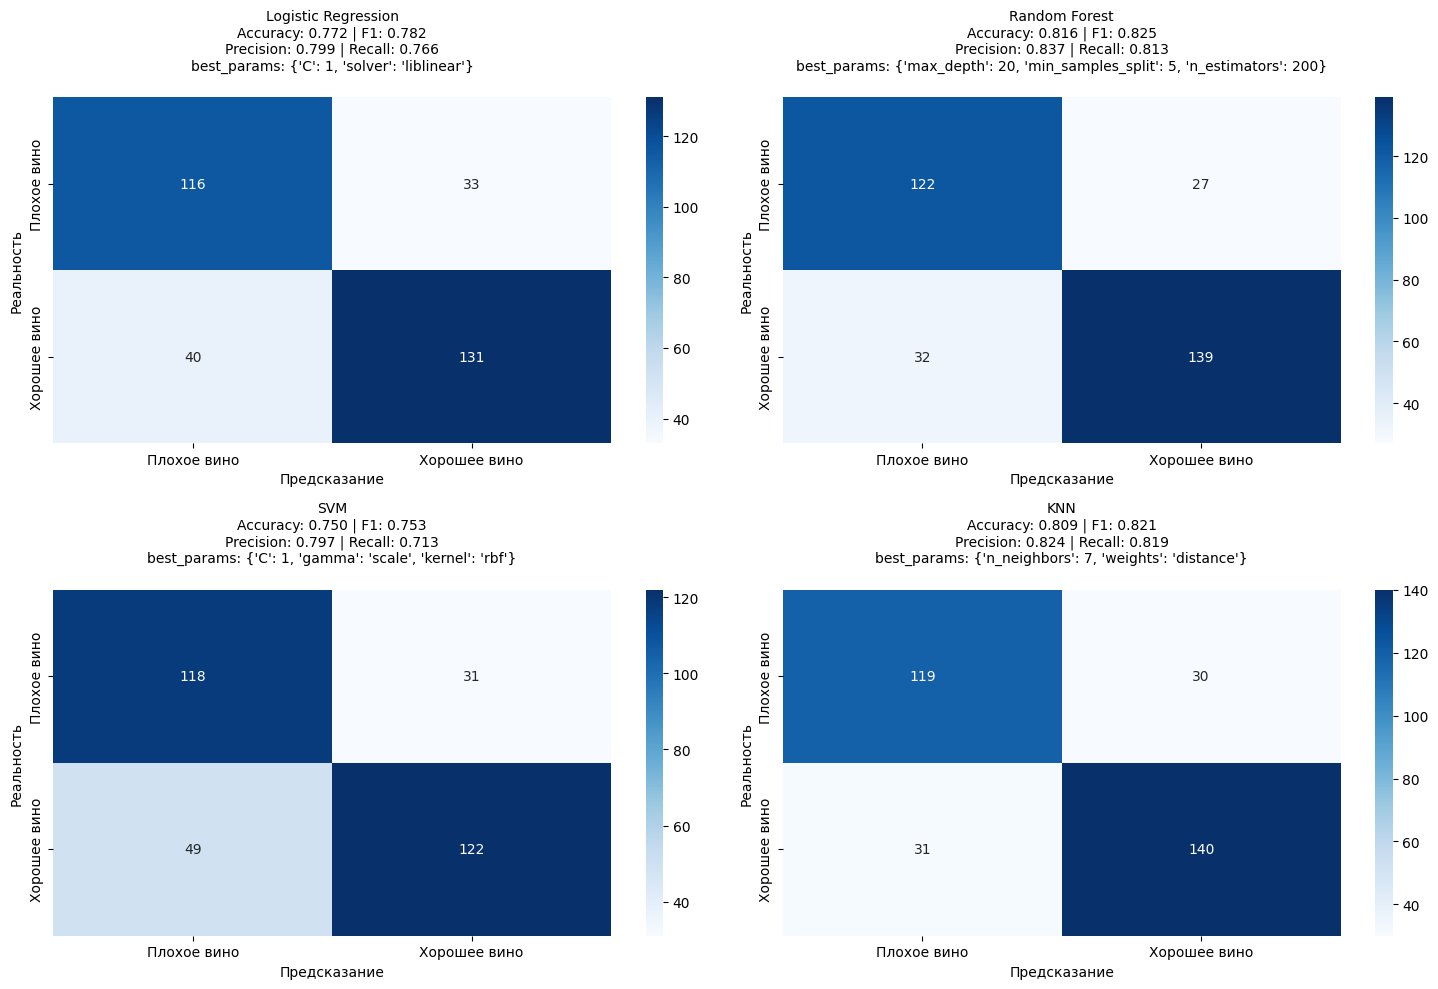

In [35]:
plt.figure(figsize=(15, 10))

for i, model_name in enumerate(best_models.keys(), 1):
    plt.subplot(2, 2, i)
    
    model = best_models[model_name]
    y_pred = model.predict(X_test_scaled)
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Плохое вино', 'Хорошее вино'],
                yticklabels=['Плохое вино', 'Хорошее вино'])
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    grid_search = GridSearchCV(
        models[model_name]['model'], 
        models[model_name]['params'], 
        cv=5, scoring='f1'
    )
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    
    plt.title(f'{model_name}\nAccuracy: {accuracy:.3f} | F1: {f1:.3f}\nPrecision: {precision:.3f} | Recall: {recall:.3f}\nbest_params: {best_params}', 
              pad=20, fontsize=10)
    plt.xlabel('Предсказание')
    plt.ylabel('Реальность')

plt.tight_layout()
plt.show()

### Вывод: 
- Random Forest имеет лучшую точность: 0.816, и F1-score: 0.825, лучше всех угадывает плохое вино, 2 место из моделей по предсказанию хорошего вина, имеет самое низкое количество неправильных предсказаний плохого вина. Лучший вариант.
- KNN имеет точность: 0.809, и F1-score: 0.821, лучшее правильное предсказание хорошего вина. хороший вариант.
- Logistic Regression точность: 0.772, F1-score: 0.782, также хороший вариант
- SVM самый худший вариант из представленных, но результаты похожи на Logistic Regression самые худшие результаты предсказания хорошего вина. Точность: 0.750, F1-score: 0.753. Однако вариант остается неплохим, но хуже остальных


Random Forest Остается лучшим вариантом для данной задачи, имеет низкое количество ложных предсказаний, отличную точность.